In [66]:
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
A0 = 0.05984281113 
CLA = 4.752798721
CLA_STALL = -3.85 
CDA = 0.6417112299
CDA_STALL = -0.9233984055
ALPHA_STALL = 0.3391428111
WINGAREA = 0.6
AIR_DENSITY = 1.2041
MASS = 1.5
G = 9.81

In [4]:
def calc_cl(angle_of_attack):
    clift = CLA * (angle_of_attack - A0)
    return clift

def calc_v_stall(clMax):
    vStall = np.sqrt((2 * MASS * G) / (AIR_DENSITY * WINGAREA * clMax))
    return vStall

In [5]:
angleList = np.arange(0, ALPHA_STALL, 0.01 * np.pi/180)
coefficient_lift_list = [calc_cl(angle) for angle in angleList]
clMax = max(coefficient_lift_list)
clMaxWeights = [.9375, .8750, .8125, .750]
vStall = calc_v_stall(clMax)
angleListDegrees = np.rad2deg(angleList)
structural_limit = np.sqrt((2 * 5 * MASS * G) / (clMax * WINGAREA * AIR_DENSITY))

print(clMax)

1.327336258892164


In [6]:
def filter_data(dataframe, start_time, end_time):
    filtered_df = dataframe[(dataframe['time'] >= start_time) & (dataframe['time'] <= end_time)]
    return filtered_df

In [7]:
def check_bounds(predicted_velocity, predicted_load_factor, velocities_lists, calc_load_factor_lists):
    num_lines_crossed = 0
    for calc_load_factor_list in calc_load_factor_lists:
        closest_index = np.argmin(np.abs(np.array(velocities_lists) - predicted_velocity))
        closest_load_factor = calc_load_factor_list[closest_index]
        if predicted_load_factor > closest_load_factor:
            num_lines_crossed += 1
    return num_lines_crossed

In [8]:
filezilla = "/home/taranto/catkin_ws/src/supervisor/flighttest/data/flightTestData.csv"
dataframe = pd.read_csv(filezilla)

In [9]:
total_time = dataframe["time1"].max() - dataframe["time1"].min()
num_plots = int(total_time // 100) + 1
sns.set_style('darkgrid')
velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}\cdot$0.938', '$Cl_{Max}\cdot$0.875', '$Cl_{Max}\cdot$0.813', '$Cl_{Max}\cdot$0.750']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)

for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)
def plot_static_data(ax):
    for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
        ax.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=opacity, linewidth=1)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


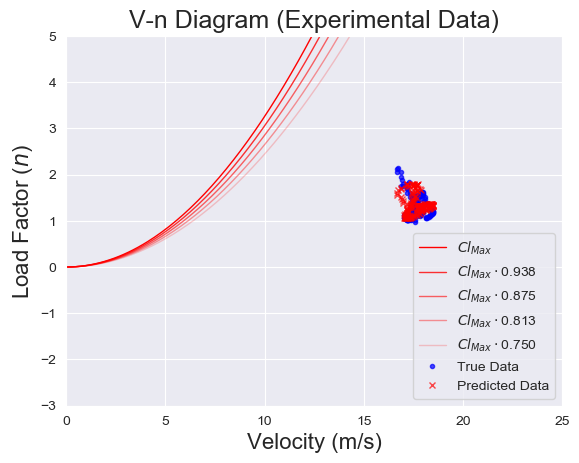

In [20]:
file1 = "/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/7-1_5.csv"
dataframe = pd.read_csv(file1)
# Add the custom time range (in seconds) here
custom_start_time = 0
custom_end_time = 100

# Filter data for the custom time range
plot_data = dataframe[(dataframe["2023-04-21_22-39-31"] >= custom_start_time) & (dataframe["2023-04-21_22-39-31"] <= custom_end_time)]

# Check if there is any data in the current time range
if not plot_data.empty:
    fig, ax = plt.subplots()
    # Plot static data
    plot_static_data(ax)
    ax.plot(plot_data["true_velocity"], plot_data["n_true"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
    ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'x', markersize=5, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

    # Customize your plot, e.g., set title, labels, etc.
    ax.set_title(f"V-n Diagram (Experimental Data)", fontsize=18)
    ax.set_xlabel("Velocity (m/s)", fontsize=16)
    ax.set_ylabel("Load Factor ($n$)", fontsize=16)
    ax.set_ylim([-3, 5])
    ax.set_xlim(left=0, right=25)
    ax.legend()
    # fig.savefig(f"plot_custom_time_range.png")
    plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


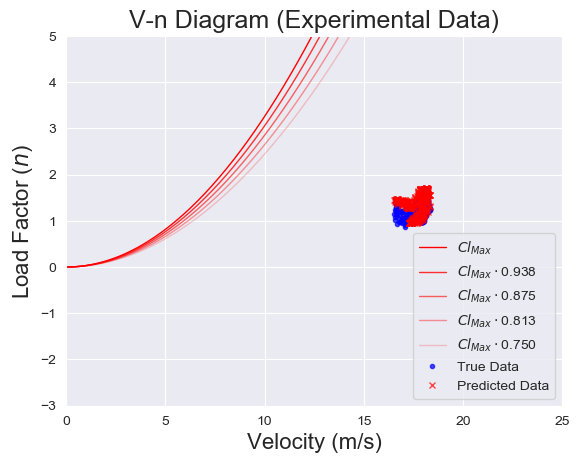

In [21]:
file1 = "/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/7-3.csv"
dataframe = pd.read_csv(file1)
# Add the custom time range (in seconds) here
custom_start_time = 0
custom_end_time = 100

# Filter data for the custom time range
plot_data = dataframe[(dataframe["2023-04-21_22-41-01"] >= custom_start_time) & (dataframe["2023-04-21_22-41-01"] <= custom_end_time)]

# Check if there is any data in the current time range
if not plot_data.empty:
    fig, ax = plt.subplots()
    # Plot static data
    plot_static_data(ax)
    ax.plot(plot_data["true_velocity"], plot_data["n_true"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
    ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'x', markersize=5, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

    # Customize your plot, e.g., set title, labels, etc.
    ax.set_title(f"V-n Diagram (Experimental Data)", fontsize=18)
    ax.set_xlabel("Velocity (m/s)", fontsize=16)
    ax.set_ylabel("Load Factor ($n$)", fontsize=16)
    ax.set_ylim([-3, 5])
    ax.set_xlim(left=0, right=25)
    ax.legend()
    # fig.savefig(f"plot_custom_time_range.png")
    plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


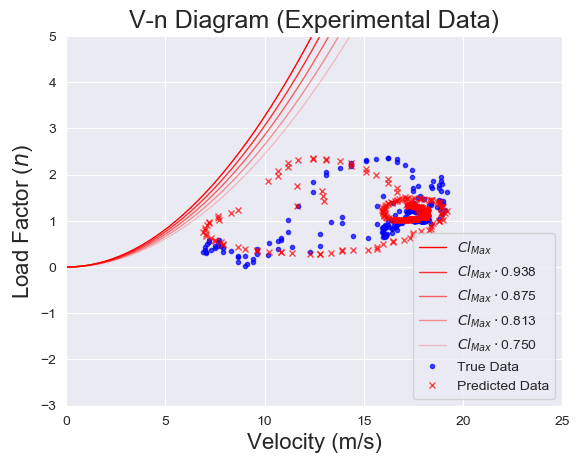

In [24]:
file1 = "/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/8-1-5.csv"
dataframe = pd.read_csv(file1)
# Add the custom time range (in seconds) here
custom_start_time = 0
custom_end_time = 100

# Filter data for the custom time range
plot_data = dataframe[(dataframe["2023-04-21_22-42-50"] >= custom_start_time) & (dataframe["2023-04-21_22-42-50"] <= custom_end_time)]

# Check if there is any data in the current time range
if not plot_data.empty:
    fig, ax = plt.subplots()
    # Plot static data
    plot_static_data(ax)
    ax.plot(plot_data["true_velocity"], plot_data["n_true"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
    ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'x', markersize=5, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

    # Customize your plot, e.g., set title, labels, etc.
    ax.set_title(f"V-n Diagram (Experimental Data)", fontsize=18)
    ax.set_xlabel("Velocity (m/s)", fontsize=16)
    ax.set_ylabel("Load Factor ($n$)", fontsize=16)
    ax.set_ylim([-3, 5])
    ax.set_xlim(left=0, right=25)
    ax.legend()
    # fig.savefig(f"plot_custom_time_range.png")
    plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


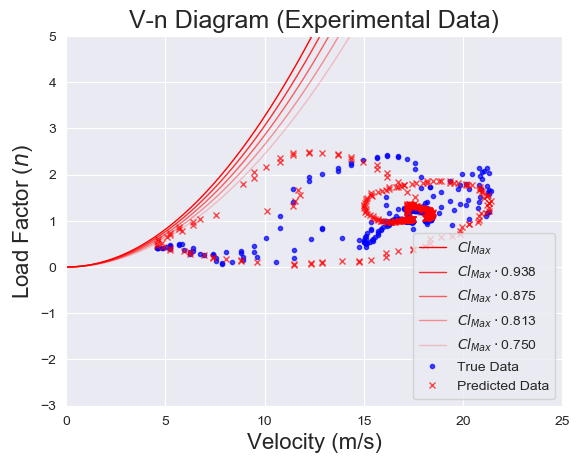

In [25]:
file1 = "/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/8-3.csv"
dataframe = pd.read_csv(file1)
# Add the custom time range (in seconds) here
custom_start_time = 0
custom_end_time = 100

# Filter data for the custom time range
plot_data = dataframe[(dataframe["2023-04-21_22-41-58"] >= custom_start_time) & (dataframe["2023-04-21_22-41-58"] <= custom_end_time)]

# Check if there is any data in the current time range
if not plot_data.empty:
    fig, ax = plt.subplots()
    # Plot static data
    plot_static_data(ax)
    ax.plot(plot_data["true_velocity"], plot_data["n_true"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
    ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'x', markersize=5, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

    # Customize your plot, e.g., set title, labels, etc.
    ax.set_title(f"V-n Diagram (Experimental Data)", fontsize=18)
    ax.set_xlabel("Velocity (m/s)", fontsize=16)
    ax.set_ylabel("Load Factor ($n$)", fontsize=16)
    ax.set_ylim([-3, 5])
    ax.set_xlim(left=0, right=25)
    ax.legend()
    # fig.savefig(f"plot_custom_time_range.png")
    plt.show()

In [103]:
file1 = "/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/8-3.csv"
dataframe = pd.read_csv(file1)
# Add the custom time range (in seconds) here
custom_start_time = 0
custom_end_time = 100

# Filter data for the custom time range
plot_data = dataframe[(dataframe["2023-04-21_22-53-22"] >= custom_start_time) & (dataframe["2023-04-21_22-53-22"] <= custom_end_time)]
filenames = ["/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/8-3.csv"] 
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []
bounds = []

START = 550
END = 600

sns.set_style('darkgrid')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}\cdot$0.938', '$Cl_{Max}\cdot$0.875', '$Cl_{Max}\cdot$0.813', '$Cl_{Max}\cdot$0.750']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.4, 0.3, 0.2]


for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)

for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

def plot_static_data(ax):
    for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
        ax.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=opacity, linewidth=1)

for i, file in enumerate(filenames):
    fig, ax = plt.subplots()
    plot_static_data(ax)

    df = pd.read_csv(file)
    # time filter data to only include data between time START and END
    # raw_df = pd.read_csv(file)
    # df = filter_data(raw_df, START, END)

    time_data = df['2023-04-21_22-41-58'].tolist()
    true_v = df['true_velocity'].tolist()
    true_n = df['n_true'].tolist()
    predict_v = df['predicted_velocity'].tolist()
    predict_n = df['predicted_n'].tolist()
    bound = df['bounds_crossed'].tolist()



    for i in range(len(time_data)):
        norm_time = (time_data[i] - min(time_data)) / (max(time_data) - min(time_data))
        cmap = cm.get_cmap('viridis')
        color = cmap(norm_time)
        if bound[i] >=4:
            ax.plot(true_v[i], true_n[i], 'o', alpha=1, markersize=3, color='red')
            ax.plot(predict_v[i], predict_n[i], 'x', alpha=1, markersize=5, color='red')
        else:
            ax.plot(true_v[i], true_n[i], 'o', alpha=1, markersize=3, color=color)
            ax.plot(predict_v[i], predict_n[i], 'x', alpha=1, markersize=5, color=color)

    cmap = cm.get_cmap('viridis')
    norm = Normalize(vmin=min(time_data), vmax=max(time_data))

    # Create a ScalarMappable object
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Add a colorbar to the plot and set its label
    cbar = plt.colorbar(sm)
    cbar.set_label('Time', fontsize=16)

ax.plot([], [], 'o', markersize=9, color="black", label='True Data ')
ax.plot([], [], 'x', markersize=9, color="black", label='Predicted Data')
 
ax.set_ylim([-2, 4])
ax.set_xlim(left=0, right=20)
ax.set_xlabel('Velocity (m/s)', fontsize=16)
ax.set_ylabel('Load Factor ($n$)', fontsize=16)
# ax.set_title("V-n Diagram", fontsize=18)
# ax.legend(fontsize='small', frameon=False, markerscale=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)

KeyError: '2023-04-21_22-53-22'

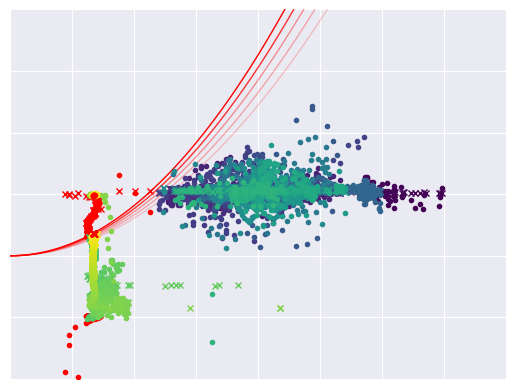

In [129]:
filenames = ["/home/taranto/catkin_ws/src/supervisor/flighttest/datasitl/flightTestData.csv"] 
csvtime = 'time1'
svgname = 'crap.svg'
custom_start_time = 0
custom_end_time = 900

time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []
bounds = []


sns.set_style('darkgrid')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}\cdot$0.938', '$Cl_{Max}\cdot$0.875', '$Cl_{Max}\cdot$0.813', '$Cl_{Max}\cdot$0.750']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.4, 0.3, 0.2]


for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)

for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

def plot_static_data(ax):
    for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
        ax.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=opacity, linewidth=1)

for i, file in enumerate(filenames):
    fig, ax = plt.subplots()
    plot_static_data(ax)

    df = pd.read_csv(file)
    # time filter data to only include data between time START and END
    # raw_df = pd.read_csv(file)
    # df = filter_data(raw_df, START, END)
    df = df[(df[csvtime] >= custom_start_time) & (df[csvtime] <= custom_end_time)]
    time_data = df[csvtime].tolist()
    true_v = df['true_velocity'].tolist()
    true_n = df['true_n'].tolist()
    predict_v = df['predicted_velocity'].tolist()
    predict_n = df['predicted_n'].tolist()
    bound = df['bounds_crossed'].tolist()



    for i in range(len(time_data)):
        norm_time = (time_data[i] - min(time_data)) / (max(time_data) - min(time_data))
        cmap = cm.get_cmap('viridis')
        color = cmap(norm_time)
        if bound[i] >=4:
            ax.plot(true_v[i], true_n[i], 'o', alpha=1, markersize=3, color='red')
            ax.plot(predict_v[i], predict_n[i], 'x', alpha=1, markersize=5, color='red')
        else:
            ax.plot(true_v[i], true_n[i], 'o', alpha=1, markersize=3, color=color)
            ax.plot(predict_v[i], predict_n[i], 'x', alpha=1, markersize=5, color=color)

    cmap = cm.get_cmap('viridis')
    norm = Normalize(vmin=min(time_data), vmax=max(time_data))

    # Create a ScalarMappable object
    # sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])

    # # Add a colorbar to the plot and set its label
    # cbar = plt.colorbar(sm)
    # cbar.set_label('Time', fontsize=16)

ax.plot([], [], 'o', markersize=9, color="black", label='True Data ')
ax.plot([], [], 'x', markersize=9, color="black", label='Predicted Data')
 
ax.set_ylim([-2, 4])
ax.set_xlim(left=0, right=20)
# ax.set_xlabel('Velocity (m/s)', fontsize=16)
# ax.set_ylabel('Load Factor ($n$)', fontsize=16)
# # ax.set_title("V-n Diagram", fontsize=18)
# # ax.legend(fontsize='small', frameon=False, markerscale=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), fancybox=True, shadow=True, ncol=3)

### crap 
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Keep the tick marks
ax.tick_params(axis='both', which='both', length=0)
# Remove the white border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# fig.set_facecolor('#f0f0f0')
plt.savefig(svgname, bbox_inches='tight')

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)